# Problem set 3

Jovana Ramos

[Education, Income, Age, and Years at a Job] 

3/11/2020

In [29]:
clear
cd C:\Users\Jovis\Desktop\SOC_211
set more off
log using C:\Users\Jovis\Desktop\SOC_211\Assignment_7.log, replace



C:\Users\Jovis\Desktop\SOC_211


log file already open


r(604);
r(604);


In [30]:
use GSS2018w7.dta

## 1. Develop hypotheses about two non-linear relationships [1 pt]

You can use the GSS data, Student aid data, or your own data. Develop at least 2 hypotheses about non-linear relationships in your dataset of choice that do the following:

    A. Use the form: The DV will change positive/negatively if the IV changes positively/negatively/categorically (specify what the variables measure and what 
    the categories are if you have a categorical hypothesis)
The respondent’s income will change positively if the respondent’s education changes positively. On the other hand, a respondent’s income will change negatively if a respondent’s education changes negatively. The dependent variable measures the respondent’s constant income while the independent variable measures the respondent’s highest year of school completed.
The respondent’s time at current job will change positively if the age of the respondents changes categorically to older. On the other hand, if a respondent’s time at the current job will change negatively if the respondents age changes categorically to younger. The dependent variable measures the time a respondent has at their current job, while independent variable measure how old in years the respondent is.
 
    B. State if you expect each hypothesized relationship will be linear or take one of the 5 non-linear forms (1. nominal, 2. sequential dummies, 3. splines, 4.
    quadratic, 5. logarithmic). You tell us at least two different non-linear forms that you think your hypothesized relationships will or will not take.
Hypothesis 1:
For the first hypothesis I expect to have a linear relationship between education and income. I believe that as individuals have higher levels of education, they will also have higher income compare to individuals who have lower levels of education.
    
Hypothesis 2:
For my second hypothesis I expect to have a non-linear relationship between time at a current job and the age of respondents. I believe that people who are older are ready to retire and therefore have longer periods of time at their jobs.

    C. State your explanation why (theory) you make the predictions in A. and B.
I made the predictions in A and B based on the theory of having more education is equal to having higher income. In addition to years in the job and education, people are 50 are closer to retiring and therefore have been at their jobs for longer periods of time.

    D. Tell us the source of your data and describe its sample.
I'm currently using the GSS data. The varibales I have access to are gender, age, race, income, years of education, and the father's years of education.     

## 2. Conduct statistical tests for your hypothesized relationship: [3 pts]

* Estimate at least 2 different types of non-linear models that test your hypotheses.

* Use appropriate regression and graphical representations to represent each model.

* Use esttab to compare between types of non-linear and linear models

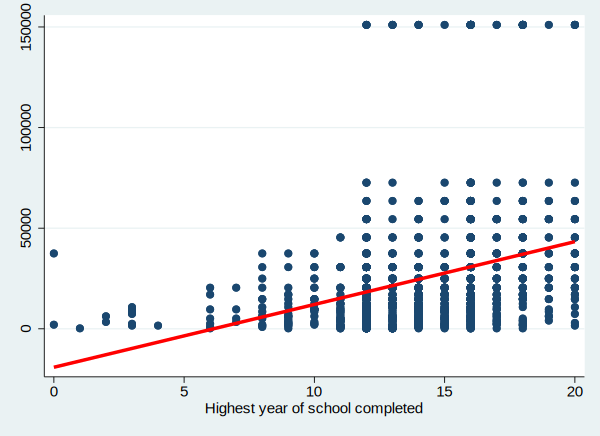

In [31]:
*Hypothesis 1: income and education
tw (scatter realrinc educ, sort) (lfit realrinc educ, color(red) lwidth(thick)), legend(off) name(linear, replace)

In [34]:
drop educcat
egen educcat = cut(educ), at(0,12,16,20,25)




(3 missing values generated)


In [35]:
tab educcat


    educcat |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        302       12.88       12.88
         12 |      1,280       54.58       67.46
         16 |        691       29.47       96.93
         20 |         72        3.07      100.00
------------+-----------------------------------
      Total |      2,345      100.00




      Source |       SS           df       MS      Number of obs   =     1,362
-------------+----------------------------------   F(3, 1358)      =     58.16
       Model |  1.2932e+11         3  4.3108e+10   Prob > F        =    0.0000
    Residual |  1.0065e+12     1,358   741194166   R-squared       =    0.1139
-------------+----------------------------------   Adj R-squared   =    0.1119
       Total |  1.1359e+12     1,361   834581390   Root MSE        =     27225

------------------------------------------------------------------------------
    realrinc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     educcat |
         12  |    6996.52   2646.768     2.64   0.008     1804.322    12188.72
         16  |   25000.26   2746.703     9.10   0.000     19612.02     30388.5
         20  |   31138.16    4777.31     6.52   0.000     21766.45    40509.87
             |
       _cons |   11

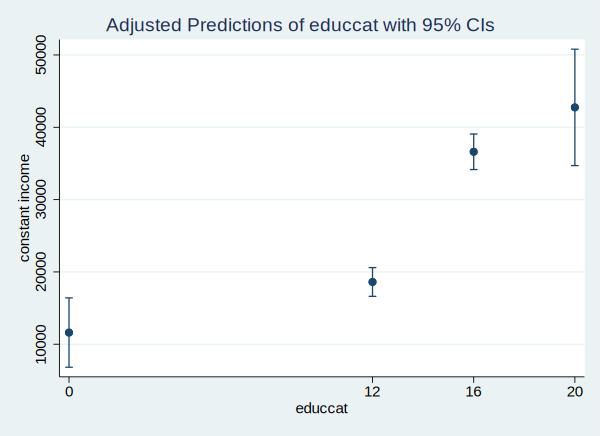

In [37]:
reg realrinc i.educcat
margins educcat, atmeans
marginsplot,  unique recast(scatter) ytitle(constant income)

In [38]:

*Hypothesis 2: years at the job and age
qui est clear

*Model 1 - no quadritic
qui eststo: regress yearsjob age

*Model 2 - quadratic added
gen age2=age^2
qui eststo: regress yearsjob age age2

**Print a table with the two models
esttab, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(3)) ///
se(fmt(3) par)) nobase




(7 missing values generated)



--------------------------------------------
                      (1)             (2)   
                 yearsjob        yearsjob   
                     b/se            b/se   
--------------------------------------------
age                 0.316***        0.282** 
                  (0.015)         (0.090)   
age2                                0.000   
                                  (0.001)   
_cons              -6.047***       -5.350** 
                  (0.702)         (1.961)   
--------------------------------------------
R-Sqaured           0.233           0.233   
N                1409.000        1409.000   
--------------------------------------------


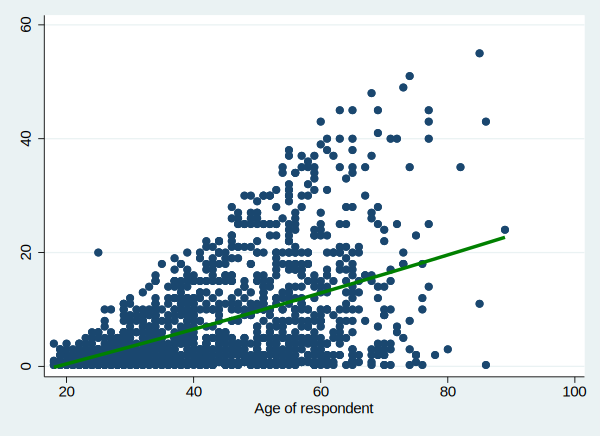

In [21]:
tw (scatter yearsjob age, sort) (qfit yearsjob age, color(green) lwidth(thick)), ///
legend(off) name(quadratic, replace)

## 3. Interpret the results [1 pt]

    A. Say whether the results support or contradict your hypothesis and why
My results do not support my hypothesis. There isn’t a non-linear association between age^2 and income using the quadratic form. In addition, there is a linear association between education and income.
    
    B. Say whether a linear or particular non-linear model best describes your data and why
I think a linear model best describes my data, due to results above. The models seem to show a linear relationship between education and income. In addition, there seems to be a linear relationship between age and years at the job.